Gabriel

## `Identificação de Spoofing em GNSS de Aeronave Utilizando Machine Learning`

Autor: Gabriel Borges Pinheiro \
Instituto Hardware BR\
Brasília– DF – Brazil\
E-mail: gabrielbopi@gmail.com


#### **`Descrição do dataset`**

O conjunto de dados descrito em "A DATASET for GPS Spoofing Detection on Unmanned Aerial Systems" (disponíveis em: https://data.mendeley.com/datasets/z7dj3yyzt8/3) contém as seguintes 13 características extraídas de oito canais paralelos durante o processamento do sinal GPS:

`1. PRN (Pseudo-Random Noise): `
Essa característica identifica o satélite do qual o sinal GPS é recebido. Ela é usada para distinguir entre sinais de diferentes satélites.

`2. DO (Doppler Offset): `
O Deslocamento Doppler mede a mudança de frequência no sinal GPS recebido devido ao movimento relativo entre o satélite e o receptor. É medido em Hz.

`3. PD (Pseudorange):`
A Pseudodistância estima a distância entre o satélite GPS e o receptor, com base no tempo de percurso do sinal. É medida em metros.

`4. RX (Tempo do Receptor):`
Essa característica representa o tempo registrado pelo receptor.

`5. TOW (Time of Week):`
O Tempo da Semana indica o número de segundos desde o início da semana GPS atual.

`6. CP (Carrier Phase):`
A Fase da Portadora captura a diferença de fase acumulada entre o sinal da portadora recebido e o sinal da portadora gerado localmente. É medida em ciclos.

`7. EC (Early Correlation):`
A Correlação Inicial é o valor da correlação entre o sinal recebido e uma réplica inicial do código gerado localmente. É usada para rastreamento de código.

`8. LC (Late Correlation):`
A Correlação Tardia é o valor da correlação entre o sinal recebido e uma réplica tardia do código gerado localmente. Também é usada para rastreamento de código.

`9. PC (Prompt Correlation):`
A Correlação Imediata é o valor da correlação entre o sinal recebido e uma réplica imediata do código gerado localmente. É usada para demodulação de dados.

`10. PIP (Prompt I-Prompt):`
O Prompt I-Prompt é o componente 'em fase' do valor de correlação imediata.

`11. PQP (Prompt Q-Prompt):`
O Prompt Q-Prompt é o componente 'em quadratura' do valor de correlação do prompt.

`12. TCD (Time of Code Delay):`
O Tempo de Atraso do Código é a diferença de tempo entre o código recebido e o código gerado localmente. É medido em segundos.

`3. CN0 (Carrier-to-Noise Density Ratio):`
A Relação Densidade-Carreira-Ruído é uma medida da intensidade do sinal em relação ao nível de ruído. É medida em dB-Hz.

Essas características foram extraídas de sinais GPS autênticos coletados usando um receptor GPS de oito canais instalado em um veículo em movimento a velocidades de 0 a 96 km/h (0 a 60 mph) para simular o voo de um UAS (Sistema Aéreo Não Tripulado), bem como de três posições estáticas no topo de diferentes edifícios para simular o voo estacionário de um UAS. Além dos sinais autênticos (classe:0), três tipos de ataques de falsificação de GPS (simplista, intermediário e sofisticado) foram simulados (classes: 1, 2 e 3, respectivamente).

#### Leitura dos dados

In [27]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# Converter planilha pura para CSV
df_xlsx = pd.read_excel("./GPS_Data_Simplified_2D_Feature_Map.xlsx")
df_xlsx.to_csv(r"./DataFrame", index=False, header=True)
# Carregar o arquivo CSV
df = pd.read_csv("./DataFrame")
df.head()

,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,6,1160.671408,-238359.543282,491568.00,491568.000795,-24660.263293,163521.78,170008.81,179294.97,178420.33,-17688.17800,1158.4806,49.412529,0
1,6,1157.827808,-238363.921192,491568.02,491568.020795,-24683.468520,158277.05,160253.09,182106.11,182106.05,158.33333,1160.7948,49.452686,0
2,6,1161.135932,-238368.638615,491568.04,491568.040795,-24706.687357,184442.36,193125.89,208228.02,-205198.30,35391.59000,1157.6909,49.480145,0
3,6,1161.156617,-238373.391775,491568.06,491568.060795,-24729.920039,159812.45,169960.55,187550.72,187543.00,-1701.94400,1161.1343,49.433769,0
4,6,1160.690893,-238378.127066,491568.08,491568.080795,-24753.153999,183557.66,191912.58,208403.50,208330.05,-5532.89990,1161.1759,49.391670,0


#### Análise descritiva

Número total de classes 4
Número de valores faltantes para cada característica:
 PRN       0
DO        0
PD        0
RX        0
TOW       0
CP        0
EC        0
LC        0
PC        0
PIP       0
PQP       0
TCD       0
CN0       0
Output    0
dtype: int64
Estatísticas descritivas do dataset:
                 PRN             DO            PD             RX  \
count  510530.000000  510530.000000  5.105300e+05  510530.000000   
mean       14.399743    1293.270723  7.992497e+06  282666.233354   
std         9.279444    2362.534207  1.006911e+07  106925.234281   
min         2.000000   -4262.754835 -6.588428e+06  173640.000000   
25%         7.000000    -868.884393  2.374256e+06  174220.600000   
50%        11.000000    1425.205130  3.777471e+06  263290.160000   
75%        26.000000    3451.204770  6.814777e+06  263799.780000   
max        31.000000    6715.759846  2.830762e+07  492039.420000   

                 TOW            CP             EC             LC  \
count  510530.000000

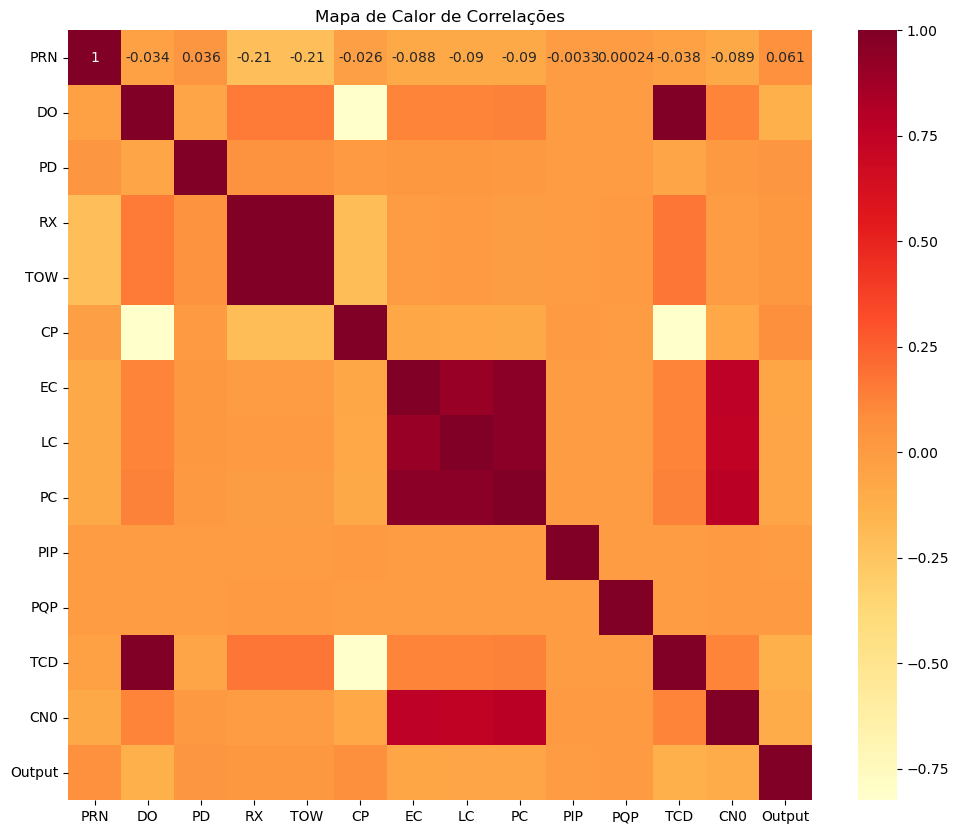

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

print('Número total de classes',len(df['Output'].unique()))
print('Número de valores faltantes para cada característica:\n',df.isnull().sum())
print("Estatísticas descritivas do dataset:")
print(df.describe())

corr_matrix = df.corr()
# Mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Mapa de Calor de Correlações')
plt.yticks(rotation=0)
plt.show()

#### Tratamento das variáveis

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Seleção das features (todas as colunas, exceto 'Output'):
X = df.drop(columns='Output')
# Variavel alvo para predição:
y = df['Output']

# Normalização das features usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão dos dados em conjuntos de treinamento e teste
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=test_size, random_state=42)

#### Contagem de elementos de cada classe

Distribuicao original de classes: Counter({0: 397825, 2: 44232, 1: 36458, 3: 32015})


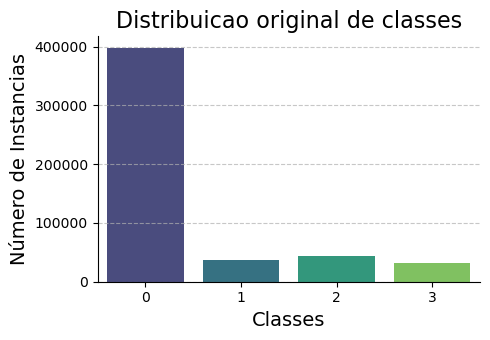

In [30]:
import collections
# Função para plotar as distribuições de classes
def plot_class_distribution(y):
    class_counts = collections.Counter(y)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    # Create a DataFrame for seaborn
    data = {'Class': classes, 'Count': counts}
    plt.figure(figsize=(5, 3.5))
    sns.barplot(x='Class', y='Count', data=data, palette='viridis')
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Número de Instancias', fontsize=14)
    plt.title('Distribuicao original de classes', fontsize=16)
    plt.xticks(classes)  # Set x-ticks to class labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine()  # Remove top and right spines for a cleaner look
    plt.tight_layout()  # Adjust layout to fit labels better
    plt.show()
# Distribuição original de classes, com plot
print("Distribuicao original de classes:", collections.Counter(y))
plot_class_distribution(y)

#### Balanceamento das amostras



Distribuicao de classes com Oversampling Aleatorio: Counter({0: 278672, 3: 278672, 2: 278672, 1: 278672})

Distribuicao de classes com Undersampling Aleatorio: Counter({0: 22295, 1: 22295, 2: 22295, 3: 22295})

Distribuicao de classes com SMOTE: Counter({0: 278672, 3: 278672, 2: 278672, 1: 278672})


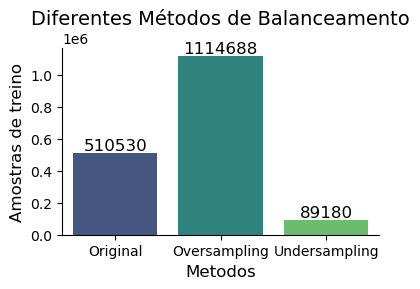

Dados de treino balanceados (oversampling)
count    1.114688e+06
mean     1.500000e+00
std      1.118034e+00
min      0.000000e+00
25%      7.500000e-01
50%      1.500000e+00
75%      2.250000e+00
max      3.000000e+00
Name: Output, dtype: float64


In [31]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Função para aplicar as tecnicas de balanceamento
def apply_balancing(X, y, technique, technique_name):
    X_resampled, y_resampled = technique.fit_resample(X, y)
    print(f"\nDistribuicao de classes com {technique_name}:", collections.Counter(y_resampled))
    return X_resampled, y_resampled
# Função para plotar o total de amostras de acordo com os difentes métodos de balanceamento
def plot_total_samples(original_count, ros_count, rus_count, smote_count):
    methods = ['Original', 'Oversampling', 'Undersampling']
    counts = [original_count, smote_count, rus_count]
    plt.figure(figsize=(4, 3))
    sns.barplot(x=methods, y=counts, palette='viridis')

    plt.xlabel('Metodos', fontsize=12)
    plt.ylabel('Amostras de treino', fontsize=12)
    plt.title('Diferentes Métodos de Balanceamento', fontsize=14)
    # Adicionar rótulos de contagem no topo das barras
    for i in range(len(counts)):
        plt.text(i, counts[i], counts[i], ha='center', va='bottom', fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()

# Contagem das amostras originais:
original_count = len(y)
# 1. Oversampling nos dados de treinamento
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = apply_balancing(X_train, y_train, ros, 'Oversampling Aleatorio')
ros_count = len(y_ros)
# 2. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = apply_balancing(X_train, y_train, rus, "Undersampling Aleatorio")
rus_count = len(y_rus)
# 3. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = apply_balancing(X_train, y_train, smote, "SMOTE")
smote_count = len(y_smote)


# Plotar o total de amostras de acordo com os difentes métodos de balanceamento
plot_total_samples(original_count, ros_count, rus_count, smote_count)
#As amostras escolhidas são com balanceamento de SMOTE
X_bal, y_bal = X_smote, y_smote
print("Dados de treino balanceados (oversampling)")
print(y_bal.describe())

#### Modelo 1: `Regressão logística`

Estimador: LogisticRegression() 

Melhor pontuação (accuracy) de validacao: 0.4442475891455483
Melhores hiperparametros encontrados: {'C': 10, 'solver': 'lbfgs'}
Report de classificação:
               precision    recall  f1-score   support

           0       0.90      0.38      0.53    119153
           1       0.16      0.42      0.24     11051
           2       0.18      0.36      0.24     13235
           3       0.12      0.61      0.21      9720

    accuracy                           0.39    153159
   macro avg       0.34      0.44      0.30    153159
weighted avg       0.73      0.39      0.46    153159



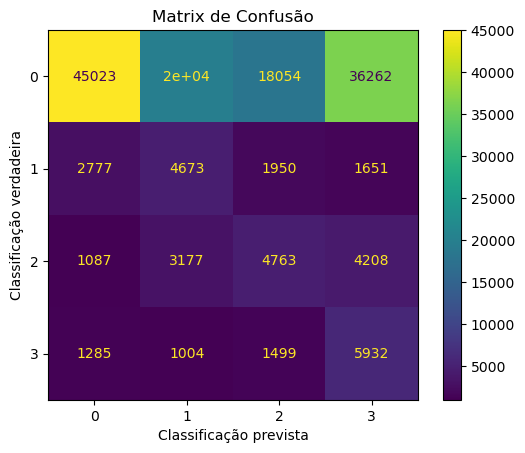

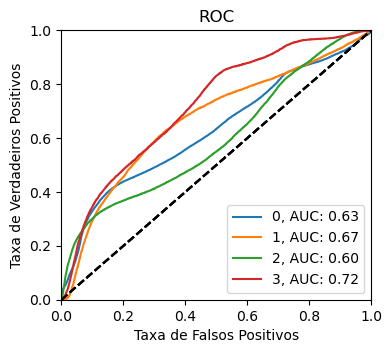

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Escolha do modelo
LogReg = LogisticRegression()
# Definindo os hiperparametros
params = { 'solver':['lbfgs','liblinear'],
    'C': [0.1, 1, 10] }
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
LG_model = GridSearchCV(LogReg, param_grid=params, scoring=scoring,
                    n_jobs =-1, cv=5)
# Ajuste do modelo
LG_model.fit(X_bal, y_bal)
print('Estimador:', LogReg,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', LG_model.best_score_)
print(f"Melhores hiperparametros encontrados: {LG_model.best_params_}")
# Previsão nos dados de teste
y_pred = LG_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
logreg_score = accuracy_score(y_true=y_test, y_pred=y_pred)

# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LG_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
from sklearn.metrics import roc_curve, auc
y_pred_probs = LG_model.predict_proba(X_test)
classes = [0,1, 2, 3]
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 2: `K-Nearest Neighbor`

Estimador: KNeighborsClassifier() 

Melhor pontuação (accuracy) de validacao: 0.8211370262390669
Melhores hiperparametros encontrados: {'n_neighbors': 7, 'weights': 'uniform'}
Report de classificação:
               precision    recall  f1-score   support

           0       0.99      0.66      0.80    119153
           1       0.44      0.87      0.59     11051
           2       0.42      0.84      0.56     13235
           3       0.36      0.92      0.52      9720

    accuracy                           0.71    153159
   macro avg       0.55      0.82      0.61    153159
weighted avg       0.86      0.71      0.74    153159



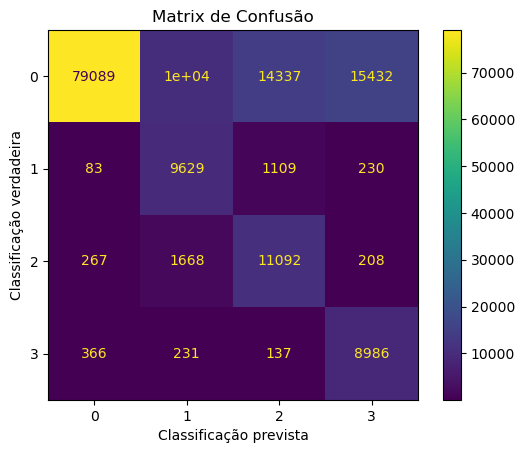

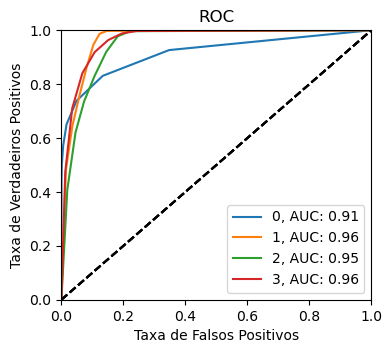

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Escolha do modelo
knn = KNeighborsClassifier()
# Definindo os hiperparametros
params = { 'n_neighbors': [3,5,7,9], 'weights': ['uniform','distance'] }
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
KNN_model = GridSearchCV(knn, param_grid=params, scoring=scoring,
                    n_jobs =-1, cv=5)
# Ajuste do modelo
KNN_model.fit(X_bal, y_bal)
print('Estimador:', knn,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', KNN_model.best_score_)
print(f"Melhores hiperparametros encontrados: {KNN_model.best_params_}")
# Previsão nos dados de teste
y_pred = KNN_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
knn_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
y_pred_probs = KNN_model.predict_proba(X_test)
classes = [0,1, 2, 3]
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 3: `Gaussian Naive Bayes`

Estimador: GaussianNB() 

Melhor pontuação (accuracy) de validacao: 0.42839201614711814
Melhores hiperparametros encontrados: {'var_smoothing': 1e-09}
Report de classificação:
               precision    recall  f1-score   support

           0       0.89      0.45      0.60    119153
           1       0.17      0.40      0.24     11051
           2       0.18      0.23      0.20     13235
           3       0.12      0.63      0.20      9720

    accuracy                           0.44    153159
   macro avg       0.34      0.43      0.31    153159
weighted avg       0.73      0.44      0.51    153159



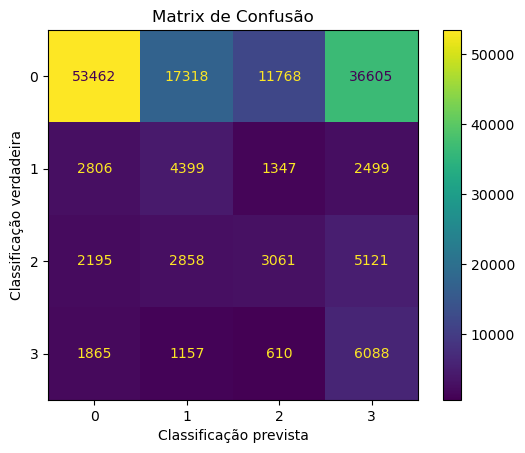

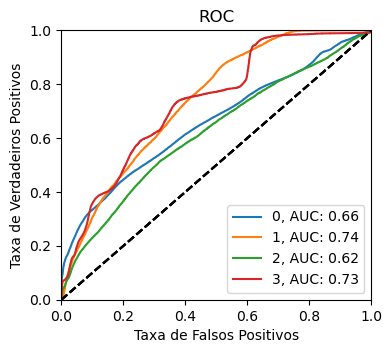

In [11]:
from sklearn.naive_bayes import GaussianNB
# Escolha do modelo
gnb = GaussianNB()
# Definindo os hiperparametros
params = { 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] }
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
GNB_model = GridSearchCV(gnb, param_grid=params, scoring=scoring,
                    n_jobs =-1, cv=5)
# Ajuste do modelo
GNB_model.fit(X_bal, y_bal)
print('Estimador:', gnb,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', GNB_model.best_score_)
print(f"Melhores hiperparametros encontrados: {GNB_model.best_params_}")
# Previsão nos dados de teste
y_pred = GNB_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
gnb_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
y_pred_probs = GNB_model.predict_proba(X_test)
classes = [0,1, 2, 3]
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 4: `Classificador Support Vector Machine`

Estimador: SVC(probability=True) 

Melhor pontuação (accuracy) de validacao: 0.8495178291096657
Melhores hiperparametros encontrados: {'C': 1, 'gamma': 0.1}
Report de classificação:
               precision    recall  f1-score   support

           0       0.99      0.66      0.80    119153
           1       0.46      0.97      0.62     11051
           2       0.45      0.82      0.58     13235
           3       0.37      0.98      0.53      9720

    accuracy                           0.72    153159
   macro avg       0.57      0.86      0.63    153159
weighted avg       0.87      0.72      0.75    153159



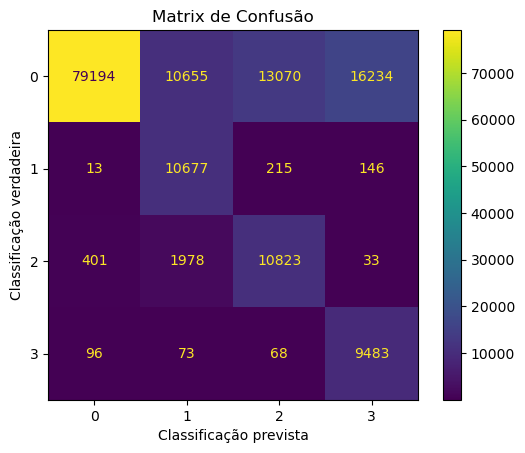

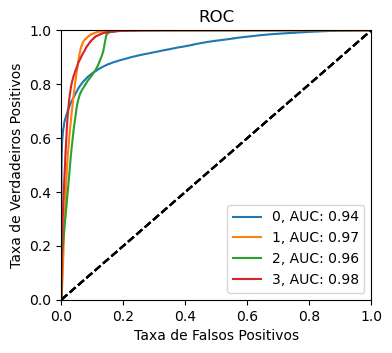

In [ ]:
from sklearn.svm import SVC
# Escolha do modelo
svc = SVC(kernel='rbf', probability=True) ## 'rbf' stands for gaussian kernel
# Definindo os hiperparametros
params = {
    'C': [1],
    'gamma' : [0.1]
}
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
SVC_model = GridSearchCV(svc, param_grid=params, scoring=scoring,
                    n_jobs =-1, cv=5)
# Ajuste do modelo
SVC_model.fit(X_bal, y_bal)
print('Estimador:', svc,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', SVC_model.best_score_)
print(f"Melhores hiperparametros encontrados: {SVC_model.best_params_}")
# Previsão nos dados de teste
y_pred = SVC_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
svc_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
y_pred_probs = SVC_model.predict_proba(X_test)
classes = [0,1, 2, 3]
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 5: `Classificador Decision Tree`

Estimador: DecisionTreeClassifier() 

Melhor pontuação (accuracy) de validacao: 0.9382372729311506
Melhores hiperparametros encontrados: {'criterion': 'gini', 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Report de classificação:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    119153
           1       0.77      0.92      0.84     11051
           2       0.69      0.91      0.79     13235
           3       0.92      1.00      0.96      9720

    accuracy                           0.94    153159
   macro avg       0.85      0.94      0.89    153159
weighted avg       0.95      0.94      0.94    153159



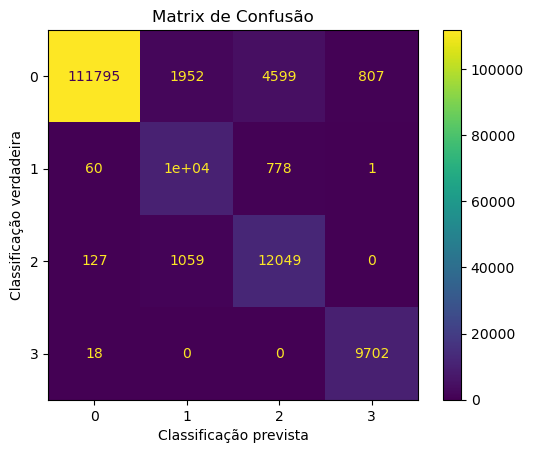

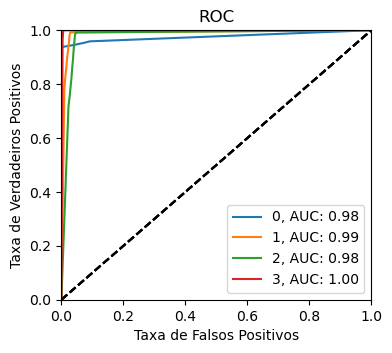

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Escolha do modelo
dtc = DecisionTreeClassifier()
# Definindo os hiperparametros
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"] }
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
DTC_model = GridSearchCV(dtc, param_grid=params, scoring=scoring,
                    n_jobs =-1, cv=5)
# Ajuste do modelo
DTC_model.fit(X_bal, y_bal)
print('Estimador:', dtc,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', DTC_model.best_score_)
print(f"Melhores hiperparametros encontrados: {DTC_model.best_params_}")
# Previsão nos dados de teste
y_pred = DTC_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
dtc_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
y_pred_probs = DTC_model.predict_proba(X_test)
classes = [0,1, 2, 3]
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 6: `Classificador Random Forest`

Estimador: RandomForestClassifier() 

Melhor pontuação (accuracy) de validacao: 0.9400201838977351
Melhores hiperparametros encontrados: {'max_features': 10, 'min_samples_leaf': 10, 'n_estimators': 100}
Report de classificação:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    119153
           1       0.75      0.92      0.83     11051
           2       0.68      0.90      0.78     13235
           3       0.92      1.00      0.96      9720

    accuracy                           0.94    153159
   macro avg       0.84      0.94      0.88    153159
weighted avg       0.95      0.94      0.94    153159



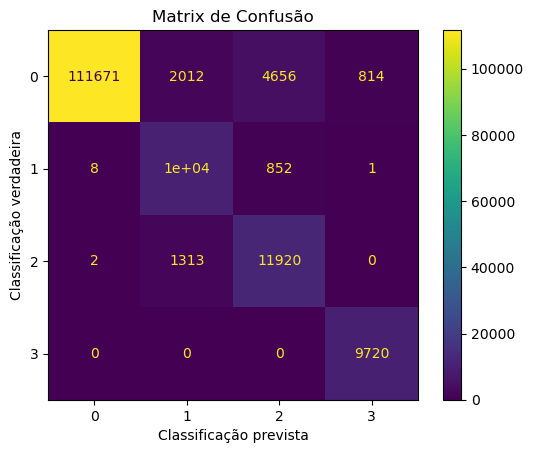

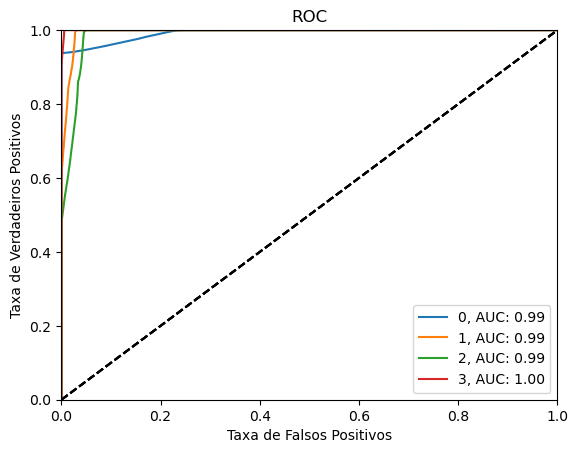

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Escolha do modelo
rfc = RandomForestClassifier()
# Definindo os hiperparametros
params = {'max_features': [10], 'min_samples_leaf': [10], 'n_estimators': [100]}
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
RFC_model = GridSearchCV(rfc, param_grid=params, scoring=scoring,
                    n_jobs =-1, cv=5)
# Ajuste do modelo
RFC_model.fit(X_bal, y_bal)
print('Estimador:', rfc,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', RFC_model.best_score_)
print(f"Melhores hiperparametros encontrados: {RFC_model.best_params_}")
# Previsão nos dados de teste
y_pred = RFC_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
rfc_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
y_pred_probs = RFC_model.predict_proba(X_test)
classes = [0,1, 2, 3]
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 7: `Gradient Boosting Machines - XGBoost`

Estimador: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 

Melhor pontuação (accuracy) de validacao: 0.9438999775734469
Melhores hiperparametros encontrados: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 60}
Report de classificação:
               precision    recall  f1-scor

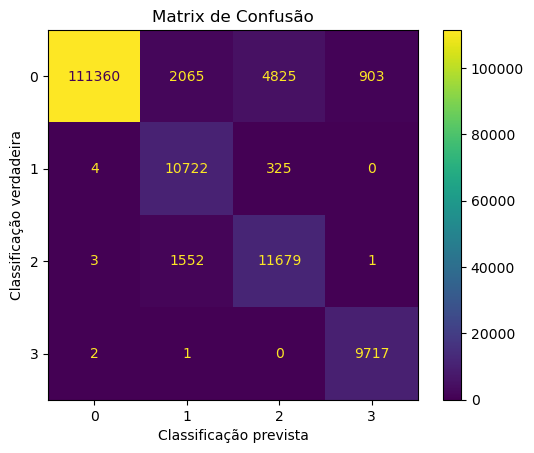

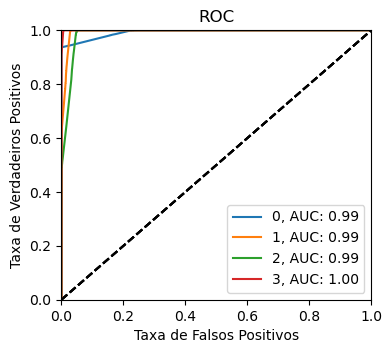

In [ ]:
from xgboost import XGBClassifier
# Escolha do modelo
xgb = XGBClassifier(objective='binary:logistic')
# Definindo os hiperparametros
params = { 'max_depth': range (2, 10, 1), 'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05] }
# Realizar a busca de hiperparâmetros com validação cruzada
scoring='accuracy' #Criterio de pontuação
XGB_model = GridSearchCV(xgb, param_grid=params, scoring=scoring, n_jobs =-1, cv=5)
# Ajuste do modelo
XGB_model.fit(X_bal, y_bal)
print('Estimador:', xgb,'\n')
print(f'Melhor pontuação ({scoring}) de validacao:', XGB_model.best_score_)
print(f"Melhores hiperparametros encontrados: {XGB_model.best_params_}")
# Previsão nos dados de teste
y_pred = XGB_model.predict(X_test)

# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
xgb_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
y_pred_probs = XGB_model.predict_proba(X_test)
classes = [0,1, 2, 3]
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

#### Modelo 8: `Rede Neural Profunda`

Epoch 1/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.7637 - loss: 0.5347 - val_accuracy: 0.6443 - val_loss: 0.7514
Epoch 2/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.8437 - loss: 0.3521 - val_accuracy: 0.7091 - val_loss: 0.7272
Epoch 3/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.8647 - loss: 0.3072 - val_accuracy: 0.8031 - val_loss: 0.4532
Epoch 4/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.8759 - loss: 0.2790 - val_accuracy: 0.9265 - val_loss: 0.2123
Epoch 5/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.8823 - loss: 0.2643 - val_accuracy: 0.8333 - val_loss: 0.3743
Epoch 6/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.8875 - loss: 0.2520 - val_accuracy: 0.8725 - val_loss: 0.3271
Epoch 7/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.8914 - loss: 0.2433 - val_accuracy: 0.8703 - val_loss: 0.3526
Epoch 8/10
7135/7135 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.8929 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 13, 128)        │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,470 (810.43 KB)

 Trainable params: 69,156 (270.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 138,314 (540.29 KB)

None 

4787/4787 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Report de classificação:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92    119153
           1       0.55      0.96      0.70     11051
           2       0.62      0.86      0.72     13235
           3       0.66      0.94      0.77      9720

    accuracy                           0.86    153159
   macro avg       0.71      0.90      0.78    153159
weighted avg       0.91      0.86      0.88    153159



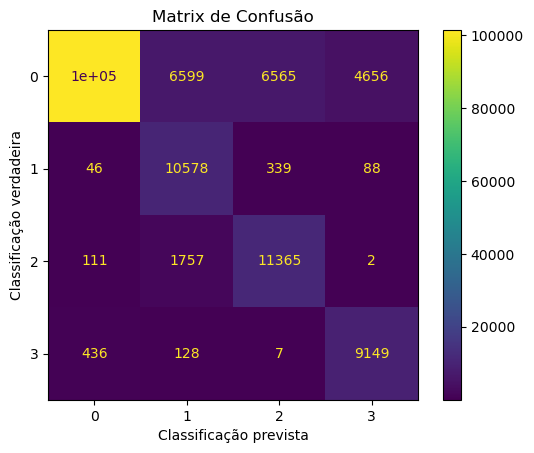

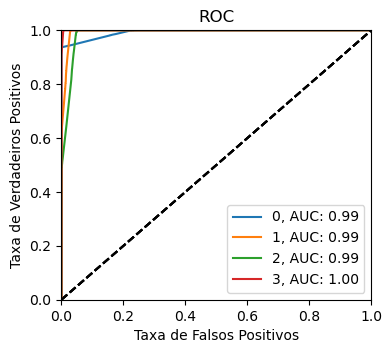

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

input_shape = (X.shape[1],1)
# Escolha do modelo
DNN_model = tf.keras.Sequential([
    keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True),input_shape=input_shape),
    keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(4, activation='softmax') ])
# Definindo os hiperparametros
batch_size=10; epochs=10
#Setando Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
percent_validation = 0.2 #Parcela de dados para validação
# Compilação do modelo
DNN_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=[scoring])
# Ajuste do modelo
DNN_model.fit(X_bal, y_bal, batch_size=batch_size, epochs=epochs,
              validation_split=percent_validation,callbacks=[early_stopping])
print( DNN_model.summary(),'\n')
# Previsão nos dados de teste
y_probs = DNN_model.predict(X_test)
y_pred = np.argmax(y_probs,axis=1)
# Avaliação do modelo
print('Report de classificação:\n', classification_report(y_true=y_test, y_pred=y_pred))
dnn_score = accuracy_score(y_true=y_test, y_pred=y_pred)
# Matrix de Confusao do conjunto de teste
cm = confusion_matrix(y_test, y_pred)
classes = [0,1, 2, 3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(); plt.title('Matrix de Confusão')
plt.xlabel('Classificação prevista'); plt.ylabel('Classificação verdadeira')
plt.show()
#ROC
# Gerar probabilidades de pertinência à cada classe:
plt.figure(figsize=(4, 3.5))
# Para cada clase
for i, clas in enumerate(classes):
  # Calcular a Taxa de Falso Posito e Taxa Verdadeiro Negativo
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,i], pos_label = clas)
  # Calcular AUC
  auroc = auc(fpr, tpr)
  # Plotar a curva de ROC AUC para cada classe
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC')
plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## Comparação de Resultados

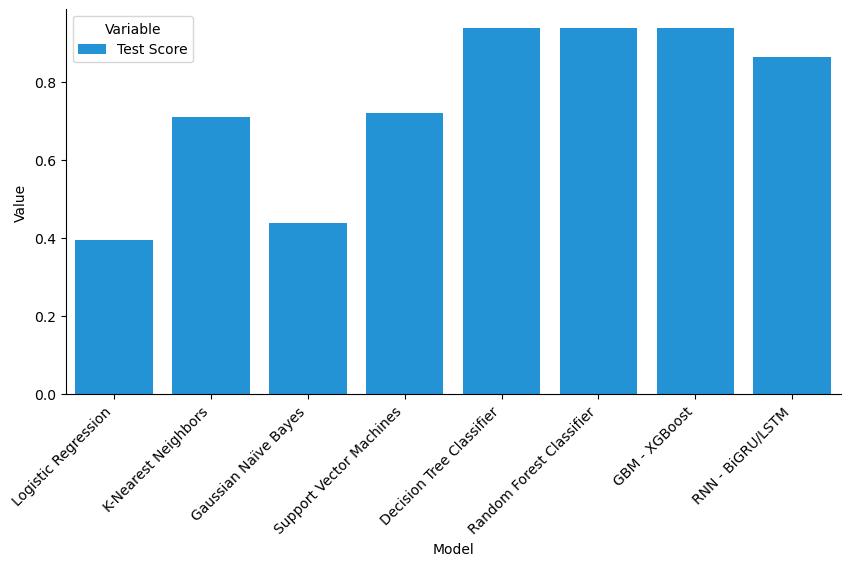

In [ ]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_score],
        ['K-Nearest Neighbors', knn_score],
        ['Gaussian Naïve Bayes', gnb_score],
        ['Support Vector Machines', svc_score],
        ['Decision Tree Classifier', dtc_score],
        ['Random Forest Classifier', rfc_score],
        ['GBM - XGBoost', xgb_score],
        ['RNN - BiGRU/LSTM', dnn_score],

    ],
    columns= ['Model', 'Test Score']
)

fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = score_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model',
            y='Value',
            hue='Variable',
            data=tidy,
            ax=ax1,
            palette=sns.xkcd_palette(["azure"]) )
# plt.ylim(20, 90)
plt.xticks(rotation=45, horizontalalignment="right")
# plt.savefig('./result.png')
sns.despine(fig)